In [3]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import os

In [4]:
dirs = ["./pics_rotated/*"]

In [5]:
glob.glob(dirs[0])

['./pics_rotated/img_0202.png',
 './pics_rotated/img_0216.png',
 './pics_rotated/img_0014.png',
 './pics_rotated/img_0028.png',
 './pics_rotated/img_0174.png',
 './pics_rotated/img_0160.png',
 './pics_rotated/img_0148.png',
 './pics_rotated/img_0149.png',
 './pics_rotated/img_0161.png',
 './pics_rotated/img_0175.png',
 './pics_rotated/img_0029.png',
 './pics_rotated/img_0015.png',
 './pics_rotated/img_0001.png',
 './pics_rotated/img_0217.png',
 './pics_rotated/img_0203.png',
 './pics_rotated/img_0215.png',
 './pics_rotated/img_0201.png',
 './pics_rotated/img_0229.png',
 './pics_rotated/img_0017.png',
 './pics_rotated/img_0003.png',
 './pics_rotated/img_0163.png',
 './pics_rotated/img_0177.png',
 './pics_rotated/img_0188.png',
 './pics_rotated/img_0189.png',
 './pics_rotated/img_0176.png',
 './pics_rotated/img_0162.png',
 './pics_rotated/img_0002.png',
 './pics_rotated/img_0016.png',
 './pics_rotated/img_0228.png',
 './pics_rotated/img_0200.png',
 './pics_rotated/img_0214.png',
 './pics

In [43]:
print( im[im[:,:] > 128] = 255)

[165 168 174 ... 132 132 131]


False 0.1
False 0.2
False 0.30000000000000004
False 0.4
True 0.5
True 0.6000000000000001
True 0.7000000000000001
True 0.8
True 0.9
True 1.0


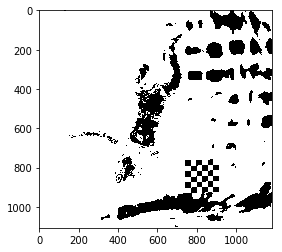

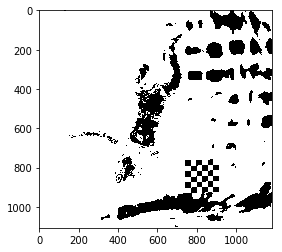

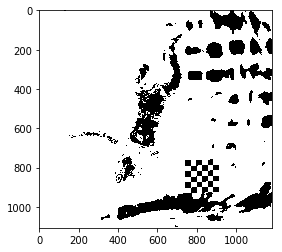

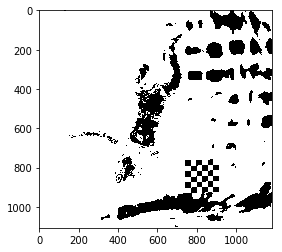

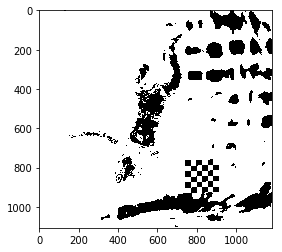

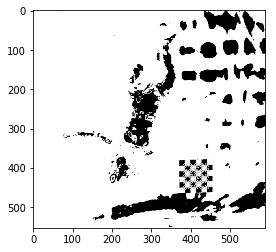

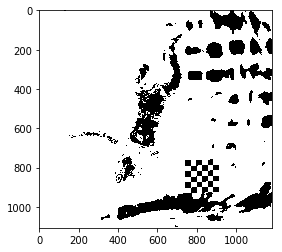

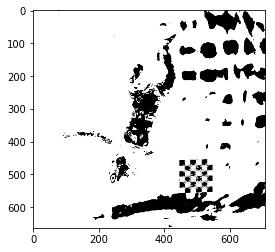

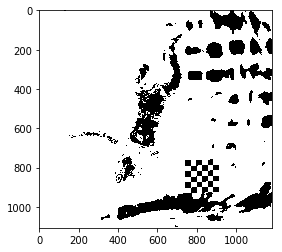

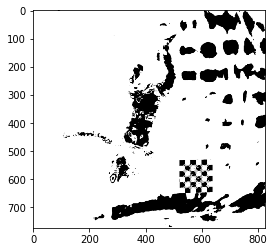

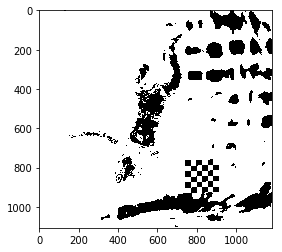

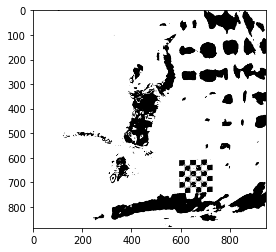

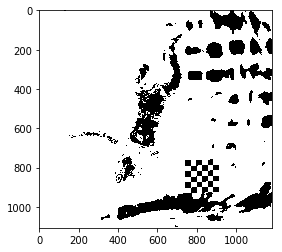

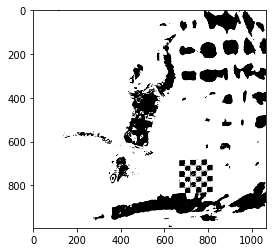

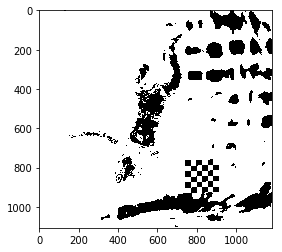

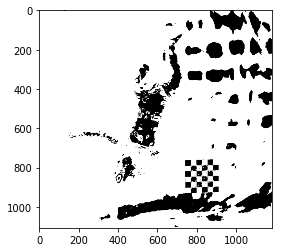

In [47]:
for j in range(1,11):
    im = cv2.imread("./with_lower_reflectivity.png")
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im[im[:,:] >= 128] = 255
    im[im[:,:] < 128] = 0
    im = 255 - im
    plt.figure()
    plt.imshow(im, cmap='gray')
    fx = j*0.1
    fy = j*0.1
    im = cv2.GaussianBlur(im, ksize = (5,5), sigmaX = 1, sigmaY = 1)
    im = cv2.resize(im, (0, 0), fx=fx, fy=fy, interpolation=cv2.INTER_AREA)
    retval, corners = cv2.findChessboardCorners(im,(nx,ny), None)
    print (retval, fx)
    if retval == True:
        plt.figure()
        cv2.drawChessboardCorners(im, (nx, ny), corners, retval)
        plt.imshow(im, cmap = 'gray')

1.0 9


AttributeError: 'NoneType' object has no attribute 'shape'

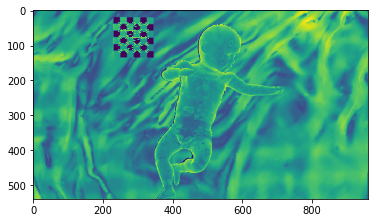

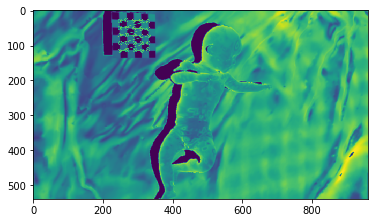

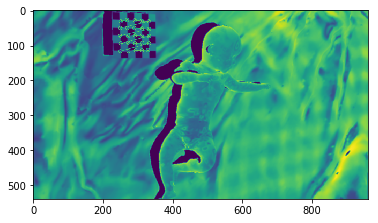

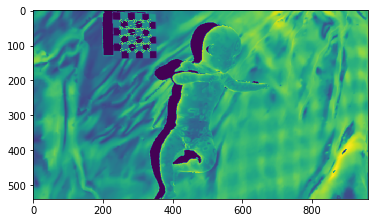

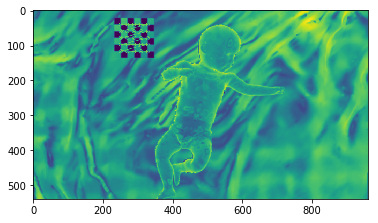

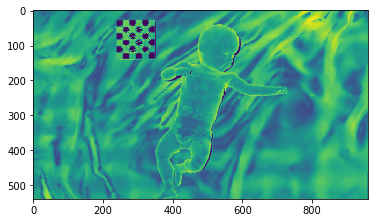

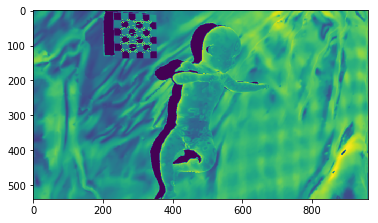

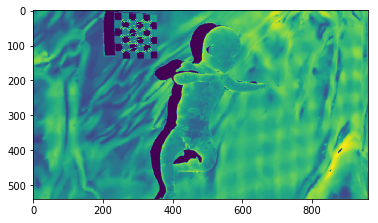

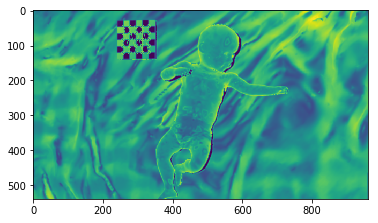

In [25]:
nx = 5
ny = 5

mesh = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
objp = np.hstack((mesh, np.zeros(shape = (nx*ny,1))))
objp = np.array(objp, dtype = np.float32)

fname = glob.glob('./pics_rotated/*.png')

for j in range(10,11):

    imgpoints = []
    objpoints = []
    imgpoints2_list = []
    detected_list = []

    fx = j*0.1
    fy = j*0.1
    for i,f in enumerate(fname):
    #     for i in range(1,11):
        try:
            imcv = cv2.imread(f)
            imcv = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)
            imcv = 1 - imcv
#                     cli = cv2.createCLAHE(clipLimit = cl)
#                     imcv = cli.apply(imcv)
            imcv = cv2.GaussianBlur(imcv, ksize = (5,5), sigmaX = 1, sigmaY = 1)
#             imcv = cv2.resize(imcv, (0, 0), fx=fx, fy=fy, interpolation=cv2.INTER_AREA)


            retval, corners = cv2.findChessboardCorners(imcv,(nx,ny), None)
            if (retval == True):
#                     print(i, imcv.shape)
                detected_list.append(f)
    #             print(f)
                plt.figure()
                cv2.drawChessboardCorners(imcv, (nx, ny), corners, retval)
                plt.imshow(imcv)
                imgpoints.append(corners)
                objpoints.append(objp)
        except Exception as e:
            pass

    print(fx, len(objpoints))
    mean_error = 1.0
    mtx = dist = rvecs = tvecs = []
    if (len(objpoints) != 0):
        retval, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imcv.shape[::-1], None, None)
        mean_error = 0.0

        for i in range(len(objpoints)):
            imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
            imgpoints2_list.append(imgpoints2)
            error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
            mean_error += error
        print( "total error: {} for scaling of {} with {} number of images for file {}".format(mean_error/len(objpoints), fx, len(objpoints), vf))

In [85]:
global_dict_with_eq = {}
for d in dirs:
    flist = glob.glob(d)
    for vf in flist:
        print(vf)
        vidcap = cv2.VideoCapture(vf)

        files = glob.glob("./vid_exp/*")
        for fl in files:
            os.remove(fl)

        success,image = vidcap.read()
        count = 0
        success = True
        while success:
            success,image = vidcap.read()
            cv2.imwrite("./vid_exp/frame%d.png" % count, image)     # save frame as PNG file
            if cv2.waitKey(10) == 27:                     # exit if Escape is hit
                break
            count += 1

        print(count)

        nx = 5
        ny = 5

        mesh = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
        objp = np.hstack((mesh, np.zeros(shape = (nx*ny,1))))
        objp = np.array(objp, dtype = np.float32)

        fname = glob.glob('./vid_exp/*.png')

        cl_arr = [2,5,10]
        for cl in cl_arr:
            for j in range(1,4):

                imgpoints = []
                objpoints = []
                imgpoints2_list = []
                detected_list = []

                fx = j*0.1
                fy = j*0.1
                for i,f in enumerate(fname):
                #     for i in range(1,11):
                    try:
                        imcv = cv2.imread(f)
                        imcv = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)
                        cli = cv2.createCLAHE(clipLimit = cl)
                        imcv = cli.apply(imcv)
                        imcv = cv2.GaussianBlur(imcv, ksize = (5,5), sigmaX = 1, sigmaY = 1)
                        imcv = cv2.resize(imcv, (0, 0), fx=fx, fy=fy, interpolation=cv2.INTER_AREA)


                        retval, corners = cv2.findChessboardCorners(imcv,(nx,ny), None)
                        if (retval == True):
        #                     print(i, imcv.shape)
                            detected_list.append(f)
                #             print(f)
                    #         plt.figure()
                           # cv2.drawChessboardCorners(imcv, (nx, ny), corners, retval)
                    #         plt.imshow(imcv)
                            imgpoints.append(corners)
                            objpoints.append(objp)
                    except Exception as e:
                        pass

                print(cl, fx, len(objpoints))
                mean_error = 1.0
                if (len(objpoints) != 0):
                    retval, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imcv.shape[::-1], None, None)
                    mean_error = 0.0

                    for i in range(len(objpoints)):
                        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
                        imgpoints2_list.append(imgpoints2)
                        error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
                        mean_error += error
                    print( "total error: {} for scaling of {} with {} number of images for file {}".format(mean_error/len(objpoints), fx, len(objpoints), vf))

                if vf not in global_dict_with_eq:
                    global_dict_with_eq[vf] = []
                
                global_dict_with_eq[vf].append([cl, fx, len(objpoints), mean_error/(len(objpoints)+0.00001)])

./v_s/shadow.mp4
186


KeyboardInterrupt: 

In [131]:
nx = 5
ny = 5

In [132]:
# cl = 2


In [133]:
# s = 0.5
imcv = cv2.imread("./vid_hard_check/frame61.png")
imcv = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)
imcv = 1 - imcv
# cli = cv2.createCLAHE(clipLimit = cl)
# imcv = cli.apply(imcv)
# imcv = cv2.GaussianBlur(imcv, ksize = (5,5), sigmaX = 1, sigmaY = 1)
# imcv = cv2.resize(imcv, (0, 0), fx=s, fy=s, interpolation=cv2.INTER_AREA)


retval, corners = cv2.findChessboardCorners(imcv,(nx,ny), None)
print(retval)

True


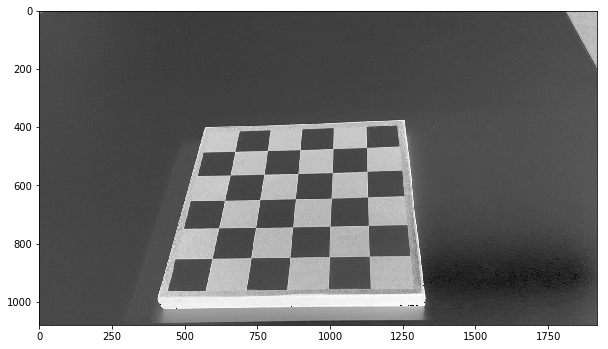

In [135]:
plt.figure(figsize=(10,10))
plt.imshow(imcv, cmap='gray')

In [127]:
img = cv2.drawChessboardCorners(imcv, (nx, ny), corners, retval)

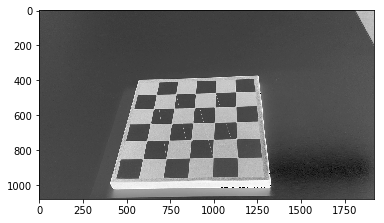

In [129]:
plt.imshow(img, cmap='gray')

In [6]:
global_dict_no_eq = {}
for d in dirs:
    flist = glob.glob(d)
    for vf in flist:
        print(vf)
#         vidcap = cv2.VideoCapture(vf)

#         files = glob.glob("./vid_hard_check/*")
#         for fl in files:
#             os.remove(fl)

#         success,image = vidcap.read()
#         count = 0
#         success = True
#         while success:
#             success,image = vidcap.read()
#             cv2.imwrite("./vid_hard_check/frame%d.png" % count, image)     # save frame as PNG file
#             if cv2.waitKey(10) == 27:                     # exit if Escape is hit
#                 break
#             count += 1

#         print(count)

        nx = 5
        ny = 5

        mesh = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
        objp = np.hstack((mesh, np.zeros(shape = (nx*ny,1))))
        objp = np.array(objp, dtype = np.float32)

        fname = glob.glob('./vid_hard_check/*.png')
        
        for j in range(1,4):

            imgpoints = []
            objpoints = []
            imgpoints2_list = []
            detected_list = []

            fx = j*0.1
            fy = j*0.1
            for i,f in enumerate(fname):
            #     for i in range(1,11):
                try:
                    imcv = cv2.imread(f)
                    imcv = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)
                    imcv = 1 - imcv
#                     cli = cv2.createCLAHE(clipLimit = cl)
#                     imcv = cli.apply(imcv)
                    imcv = cv2.GaussianBlur(imcv, ksize = (5,5), sigmaX = 1, sigmaY = 1)
                    imcv = cv2.resize(imcv, (0, 0), fx=fx, fy=fy, interpolation=cv2.INTER_AREA)


                    retval, corners = cv2.findChessboardCorners(imcv,(nx,ny), None)
                    if (retval == True):
    #                     print(i, imcv.shape)
                        detected_list.append(f)
            #             print(f)
                #         plt.figure()
                       # cv2.drawChessboardCorners(imcv, (nx, ny), corners, retval)
                #         plt.imshow(imcv)
                        imgpoints.append(corners)
                        objpoints.append(objp)
                except Exception as e:
                    pass

            print(fx, len(objpoints))
            mean_error = 1.0
            mtx = dist = rvecs = tvecs = []
            if (len(objpoints) != 0):
                retval, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imcv.shape[::-1], None, None)
                mean_error = 0.0

                for i in range(len(objpoints)):
                    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
                    imgpoints2_list.append(imgpoints2)
                    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
                    mean_error += error
                print( "total error: {} for scaling of {} with {} number of images for file {}".format(mean_error/len(objpoints), fx, len(objpoints), vf))

            if vf not in global_dict_no_eq:
                global_dict_no_eq[vf] = []

            global_dict_no_eq[vf].append([fx, len(objpoints), mean_error/(len(objpoints)+0.00001), mtx, dist])

./pics_rotated/img_0202.png


KeyboardInterrupt: 

In [119]:
len(objpoints)

13

In [54]:
# import pickle

# f = open("./camera_errors_params.pkl", 'wb')
# pickle.dump(global_dict_no_eq, f)
# f.close()

# f = open("./camera_errors_with_eq.pkl", 'wb')
# pickle.dump(global_dict_with_eq, f)
# f.close()

In [17]:
for key in global_dict_with_eq.keys():
    print(key, global_dict_with_eq[key])
    print("\n")

./v_v/shadow.mp4 [[2, 0.1, 0, 1.0], [2, 0.2, 37, 0.1162236776120348], [2, 0.30000000000000004, 34, 0.09540713866153669], [5, 0.1, 0, 1.0], [5, 0.2, 48, 0.07053487291221959], [5, 0.30000000000000004, 35, 0.10036760729947475], [10, 0.1, 0, 1.0], [10, 0.2, 22, 0.12570880096319972], [10, 0.30000000000000004, 29, 0.13130450125298626]]


./v_v/normal.mp4 [[2, 0.1, 11, 0.045131209711095105], [2, 0.2, 109, 0.044854891440231054], [2, 0.30000000000000004, 101, 0.06564555425303907], [5, 0.1, 1, 0.12699470524385287], [5, 0.2, 40, 0.077653760283046], [5, 0.30000000000000004, 62, 0.08321683373817114], [10, 0.1, 2, 0.08684819327608279], [10, 0.2, 2, 0.11740542117648758], [10, 0.30000000000000004, 4, 0.1267673371201347]]


./v_v/illu.mp4 [[2, 0.1, 14, 0.1399227705203131], [2, 0.2, 51, 0.08266194053418605], [2, 0.30000000000000004, 61, 0.09907114087657662], [5, 0.1, 6, 0.1240774681875821], [5, 0.2, 40, 0.04630976610304423], [5, 0.30000000000000004, 39, 0.0956453307978297], [10, 0.1, 3, 0.12829716440981

In [13]:
at = global_dict_with_eq
b = global_dict_no_eq

In [ ]:
vv_s = 0.08684819327608279
vv_n = 0.06564555425303907
vv_i = 0.04630976610304423
vv_f = 0.06755149834582377

vs_s = 0.04043636146989359
vs_n = 0.0397322715506765
vs_i = 0.04385700211221671
vs_f = 0.043480910391920216

In [35]:
i = 0
m = d = 0
for key in global_dict_no_eq.keys():
    if i < 4:
        l = global_dict_no_eq[key]
        if i != 1:
            err = 1.0
            mtx = []
            dist = []
            for el in l:
                if(el[2] < err):
                    err = el[2]
                    mtx = el[3]
                    dist = el[4]
            m += mtx
            d += dist
            i += 1

In [51]:
marr

[array([[385.90552567,   0.        , 181.51643155],
        [  0.        , 383.86942724, 117.92056598],
        [  0.        ,   0.        ,   1.        ]]),
 array([[314.90251202,   0.        , 187.21897662],
        [  0.        , 349.63775029, 208.87831146],
        [  0.        ,   0.        ,   1.        ]])]

In [53]:
summer = 0
for m in marr:
    summer += m
    
summer = summer/2
summer

array([[350.40401884,   0.        , 184.36770408],
       [  0.        , 366.75358876, 163.39943872],
       [  0.        ,   0.        ,   1.        ]])

In [46]:
summer = 0
for m in marr:
    summer += m
    
summer = summer/3
summer

array([[321.05511055,   0.        , 186.20050001],
       [  0.        , 320.41369034, 102.37051457],
       [  0.        ,   0.        ,   1.        ]])

In [50]:
marr = []
i = 0
for key in global_dict_no_eq.keys():
    if i <8 and i >=4 :
        l = global_dict_no_eq[key]
        err = 1.0
        mtx = []
        dist = []
        scale = 0
        for el in l:
            if(el[2] < err):
                err = el[2]
                mtx = el[3]
                dist = el[4]
                scale = el[0]
        print(scale)
        if scale == 0.2:
            marr.append(mtx)
        print(key)
        print(err)
        print(mtx)
        print(dist)
    #     np.linalg.norm(mtx-m)
        print("\n")
    i +=1

0.2
./v_s/shadow.mp4
0.06928994752384347
[[385.90552567   0.         181.51643155]
 [  0.         383.86942724 117.92056598]
 [  0.           0.           1.        ]]
[[-4.17234687e-03  2.51410526e+00  3.66873162e-02 -7.20442136e-03
  -1.17729369e+01]]


0.30000000000000004
./v_s/normal.mp4
0.06842991997535276
[[605.35627491   0.         293.79051026]
 [  0.         847.85741563 164.5545093 ]
 [  0.           0.           1.        ]]
[[ 0.97437658 -2.28026679  0.0834388   0.10085991  0.3472743 ]]


0.1
./v_s/illu.mp4
0.0670429509348757
[[152.07295974   0.          96.30645964]
 [  0.         152.91970863  51.17337108]
 [  0.           0.           1.        ]]
[[-1.47170778e+00  2.32146860e+01 -1.84309733e-02 -2.00889727e-02
  -1.15616435e+02]]


0.2
./v_s/flash.mp4
0.049839442519122874
[[314.90251202   0.         187.21897662]
 [  0.         349.63775029 208.87831146]
 [  0.           0.           1.        ]]
[[ 0.2300067  -0.48564594  0.00452047  0.00115319  0.34778357]]




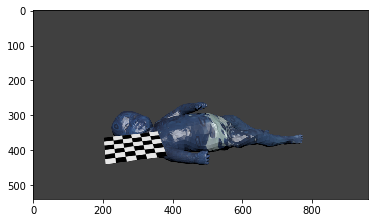

In [155]:
imcv = cv2.imread("./../Wadhwani/anthro-3d/pics/img_0010.png")
plt.imshow(imcv)

False


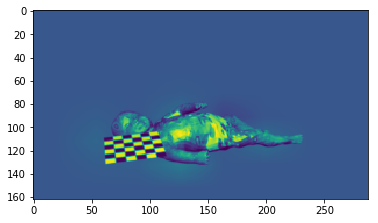

In [156]:
imcv = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)
cli = cv2.createCLAHE(clipLimit = cl)
imcv = cli.apply(imcv)
imcv = cv2.GaussianBlur(imcv, ksize = (5,5), sigmaX = 1, sigmaY = 1)
imcv = cv2.resize(imcv, (0, 0), fx=fx, fy=fy, interpolation=cv2.INTER_AREA)


retval, corners = cv2.findChessboardCorners(imcv,(nx,ny), None)
print(retval)
cv2.drawChessboardCorners(imcv, (nx, ny), corners, retval)
plt.imshow(imcv)

In [160]:
len(fname)

0

In [165]:
nx = 5
ny = 5

mesh = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
objp = np.hstack((mesh, np.zeros(shape = (nx*ny,1))))
objp = np.array(objp, dtype = np.float32)

fname = glob.glob('./../Wadhwani/anthro-3d/pics/*.png')

cl_arr = [2,5,10]
for cl in cl_arr:
    for j in range(1,4):

        imgpoints = []
        objpoints = []
        imgpoints2_list = []
        detected_list = []

        fx = j*0.1
        fy = j*0.1
        for i,f in enumerate(fname):
        #     for i in range(1,11):
            try:
                imcv = cv2.imread(f)
    #             cli = cv2.createCLAHE(clipLimit = 100.0)
    #             imcv = cli.apply(imcv)

    #             imcv = cv2.resize(imcv, (640,352),interpolation=cv2.INTER_AREA)
    #             print(imcv.shape)
                imcv = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)
                cli = cv2.createCLAHE(clipLimit = cl)
                imcv = cli.apply(imcv)
                imcv = cv2.GaussianBlur(imcv, ksize = (5,5), sigmaX = 1, sigmaY = 1)
                imcv = cv2.resize(imcv, (0, 0), fx=fx, fy=fy, interpolation=cv2.INTER_AREA)


                retval, corners = cv2.findChessboardCorners(imcv,(nx,ny), None)
                if (retval == True):
#                     print(i, imcv.shape)
                    detected_list.append(f)
        #             print(f)
            #         plt.figure()
                   # cv2.drawChessboardCorners(imcv, (nx, ny), corners, retval)
            #         plt.imshow(imcv)
                    imgpoints.append(corners)
                    objpoints.append(objp)
            except Exception as e:
                pass

        print(cl, j, len(objpoints))
        if (len(objpoints) != 0):
            retval, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imcv.shape[::-1], None, None)
            mean_error = 0

            for i in range(len(objpoints)):
                imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
                imgpoints2_list.append(imgpoints2)
                error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
                mean_error += error
            print( "total error: {} for scaling of {} with {} number of images".format(mean_error/len(objpoints), fx, len(objpoints)) )


2 1 46
total error: 0.059682735668165184 for scaling of 0.1 with 46 number of images
2 2 58
total error: 0.05435490190288243 for scaling of 0.2 with 58 number of images
2 3 60
total error: 0.07214368802971857 for scaling of 0.30000000000000004 with 60 number of images
5 1 34
total error: 0.056214899910744034 for scaling of 0.1 with 34 number of images
5 2 54
total error: 0.04249025327128667 for scaling of 0.2 with 54 number of images
5 3 50
total error: 0.07312590083991637 for scaling of 0.30000000000000004 with 50 number of images
10 1 43
total error: 0.05979223227145881 for scaling of 0.1 with 43 number of images
10 2 56
total error: 0.04981072178829838 for scaling of 0.2 with 56 number of images
10 3 62
total error: 0.06363577559134413 for scaling of 0.30000000000000004 with 62 number of images


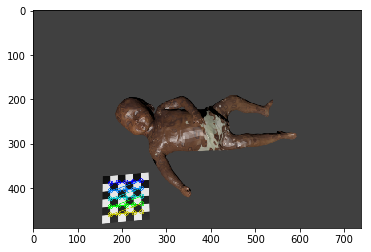

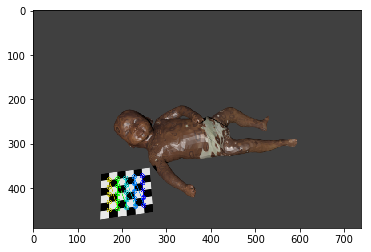

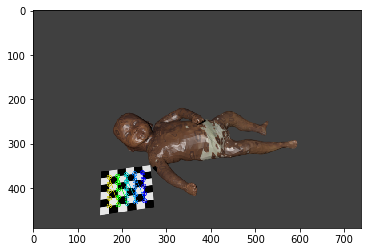

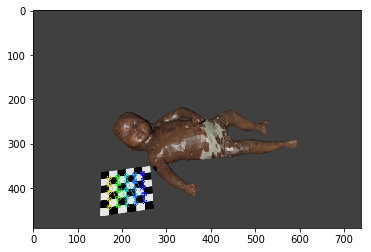

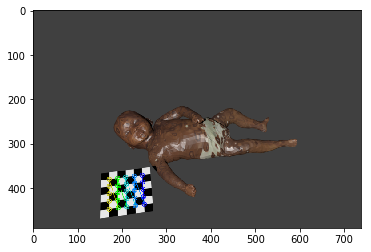

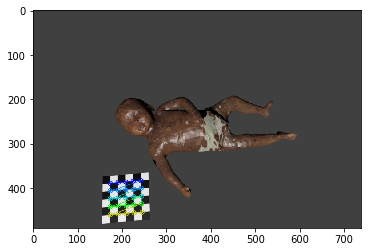

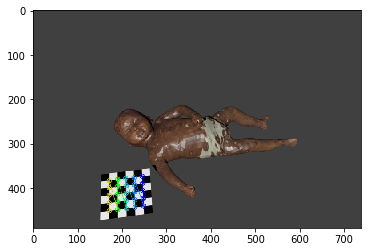

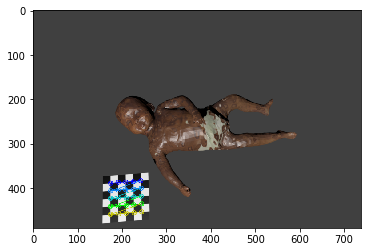

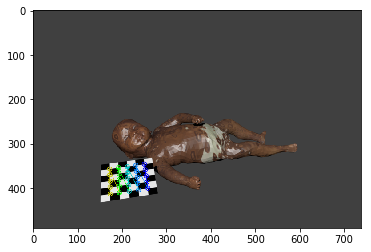

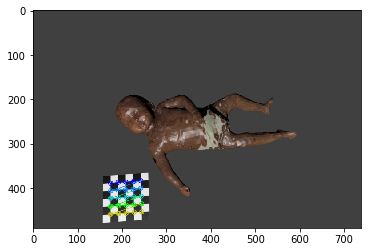

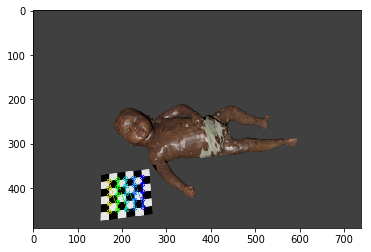

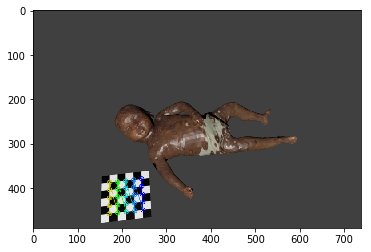

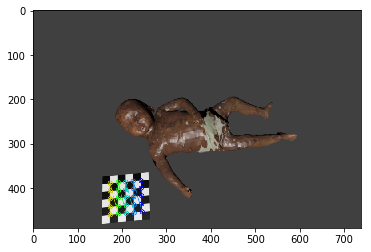

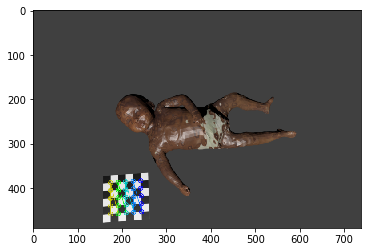

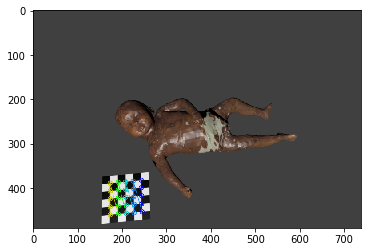

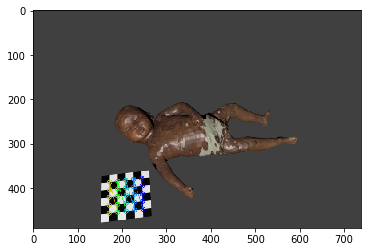

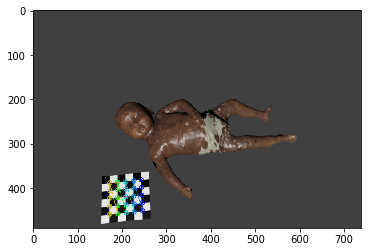

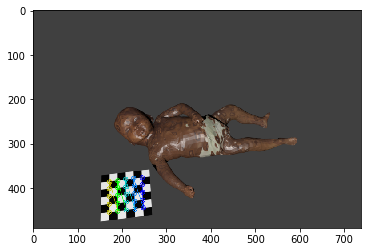

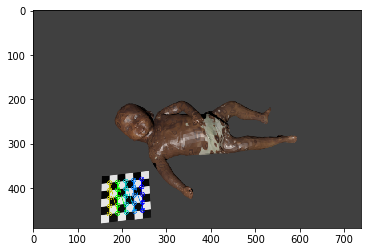

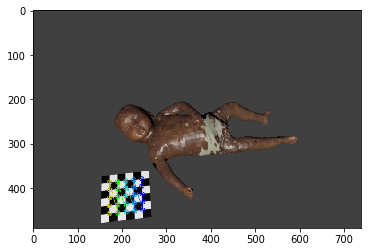

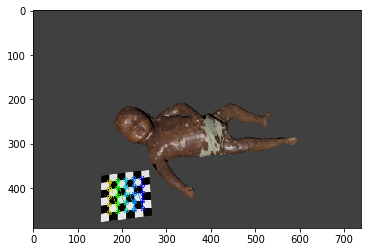

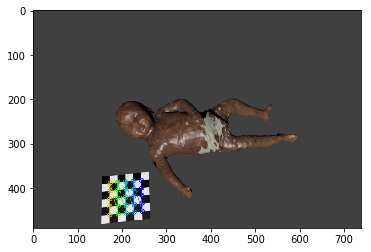

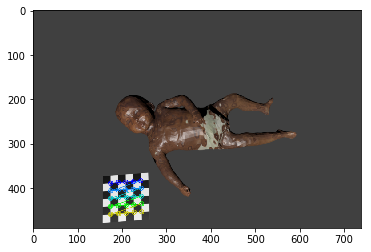

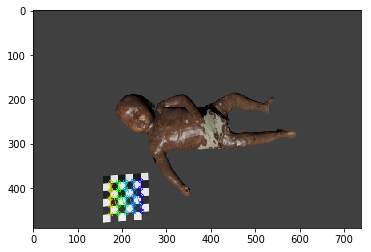

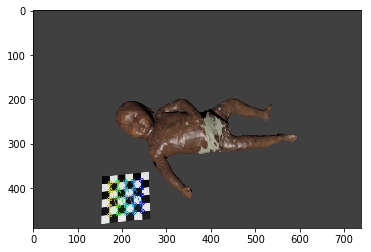

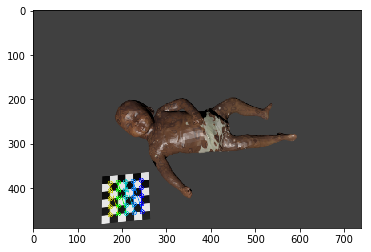

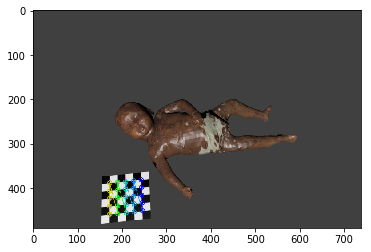

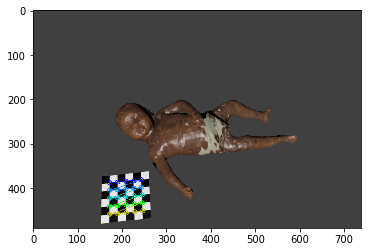

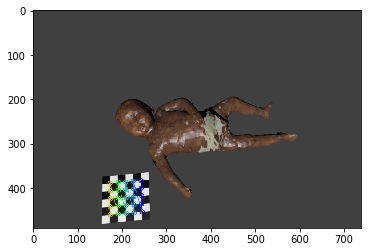

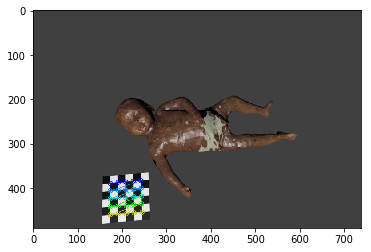

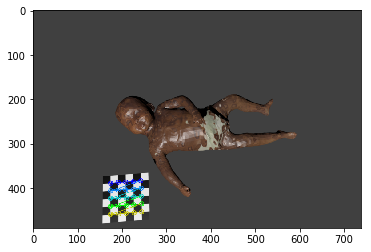

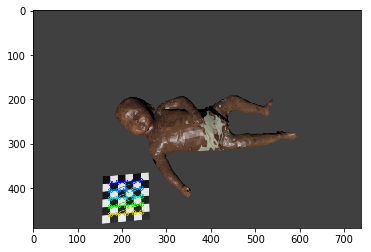

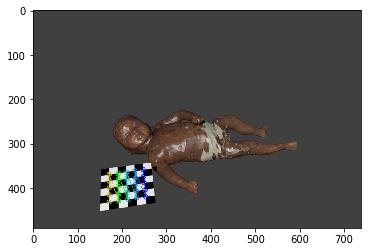

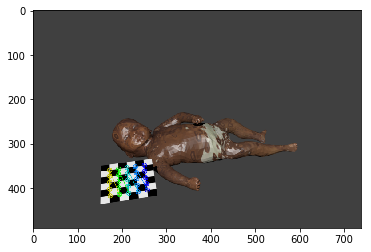

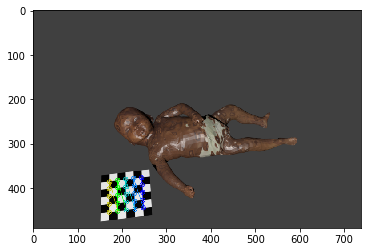

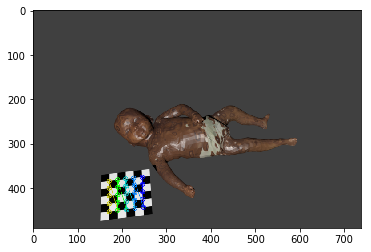

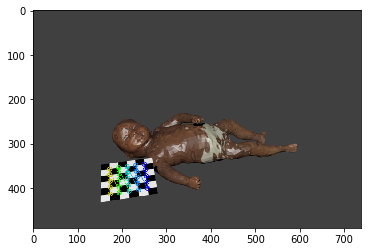

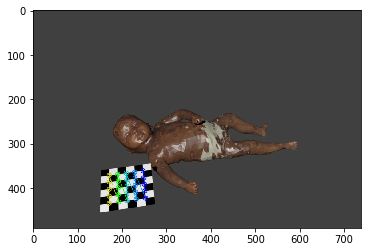

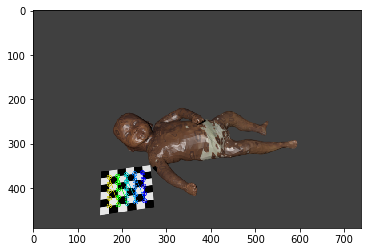

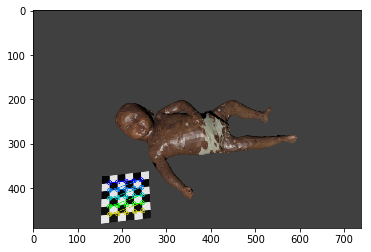

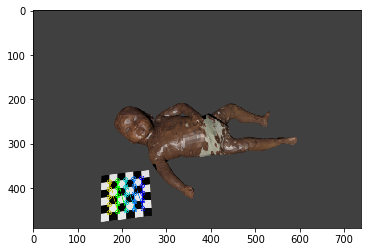

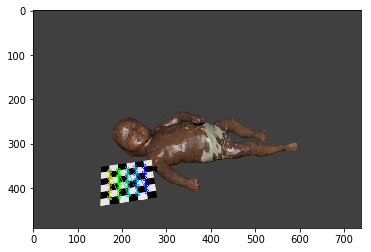

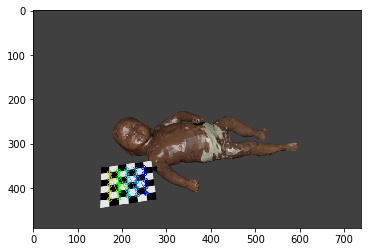

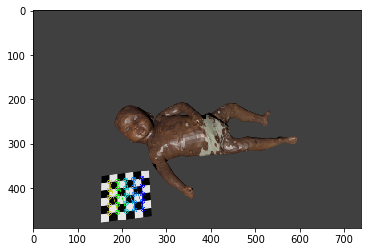

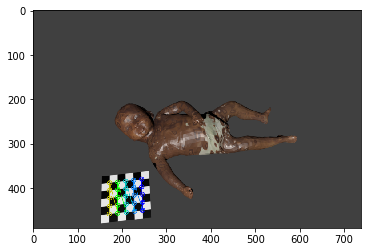

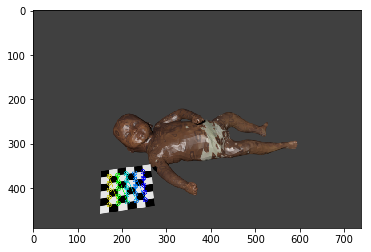

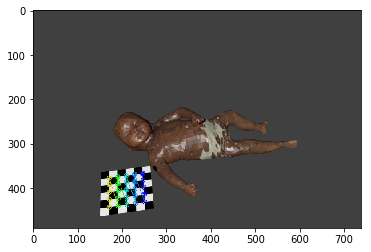

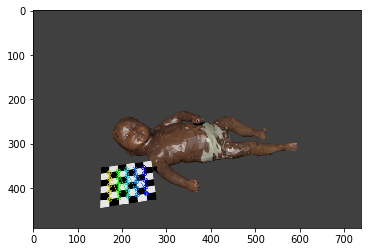

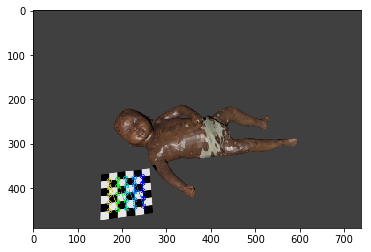

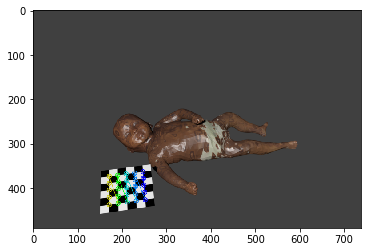

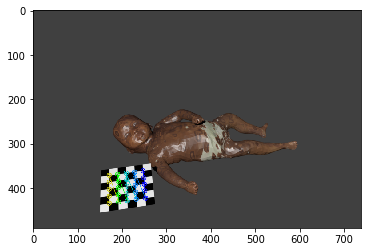

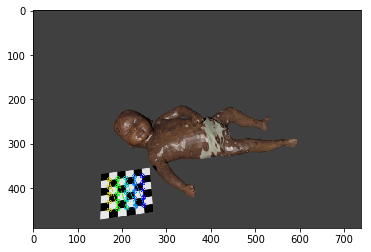

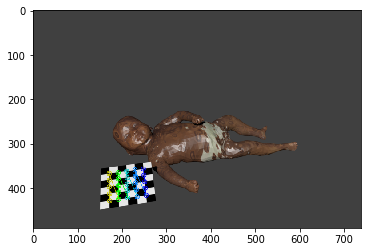

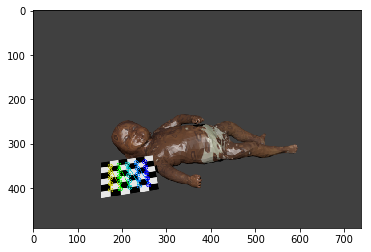

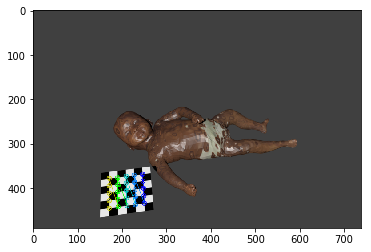

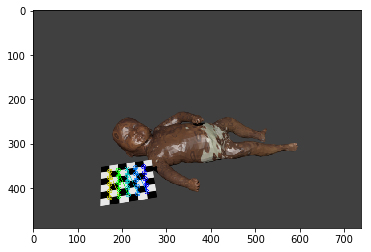

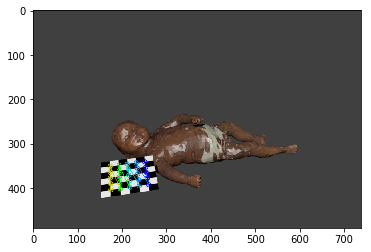

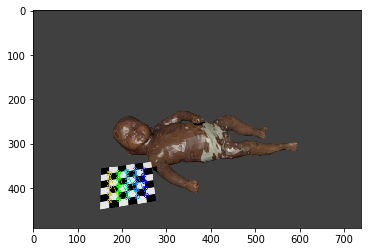

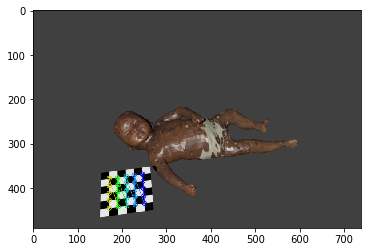

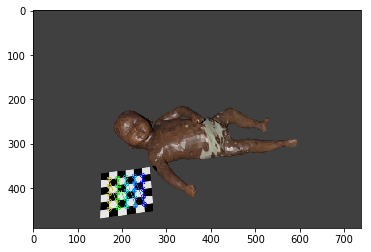

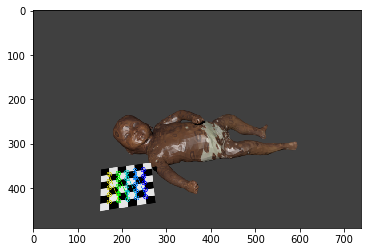

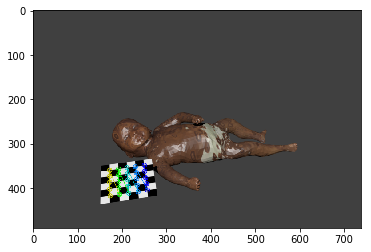

In [167]:
i = 0
for f in detected_list:
    imcv = cv2.imread(f)

    #             imcv = cv2.resize(imcv, (640,352),interpolation=cv2.INTER_AREA)
    imcv = cv2.cvtColor(imcv, cv2.COLOR_BGR2RGB)
    imcv = cv2.GaussianBlur(imcv, ksize = (5,5), sigmaX = 1, sigmaY = 1)
    imcv = cv2.resize(imcv, (0, 0), fx=fx, fy=fy, interpolation=cv2.INTER_AREA)
    cv2.drawChessboardCorners(imcv, (nx, ny), imgpoints2_list[i], True)
    i += 1
    plt.figure()
    plt.imshow(imcv)
#     var = 'recal_{}.jpg'.format(i)
#     plt.imsave(var,imcv)
#     if i == 10:
#         break

In [168]:
imcv = cv2.imread(f)
imcv = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)
imcv = cv2.GaussianBlur(imcv, ksize = (5,5), sigmaX = 1, sigmaY = 1)
imcv = cv2.resize(imcv, (0, 0), fx=fx, fy=fy, interpolation=cv2.INTER_AREA)
retval, corners = cv2.findChessboardCorners(imcv,(nx,ny), None)
print(retval)

True


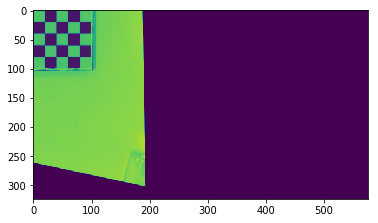

In [249]:
sp = corners
src = np.array([[[sp[0,0,0], sp[0,0,1]], [sp[4,0,0], sp[4,0,1]], [sp[24,0,0], sp[24,0,1]], [sp[20,0,0], sp[20,0,1]]]],dtype=np.float32)
dst = np.array([[[objp[0,0], objp[0,1]], [objp[4,0], objp[4,1]], [objp[24,0], objp[24,1]], [objp[20,0], objp[20,1]]]],dtype=np.float32)
PM = cv2.getPerspectiveTransform(src,dst)
warped = cv2.warpPerspective(imcv, PM, imcv.shape[1::-1], flags = cv2.INTER_LINEAR) 
plt.imshow(warped)


In [267]:
obj = np.reshape(objp[:,:2], newshape=(1,objp.shape[0],2))
obj.shape

(1, 25, 2)

In [82]:
global_dict_no_eq = {}
for d in dirs:
    flist = glob.glob(d)
    for vf in flist:
        print(vf)
        vidcap = cv2.VideoCapture(vf)

        files = glob.glob("./vid_hard_check/*")
        for fl in files:
            os.remove(fl)

        success,image = vidcap.read()
        count = 0
        success = True
        while success:
            success,image = vidcap.read()
            cv2.imwrite("./vid_hard_check/frame%d.png" % count, image)     # save frame as PNG file
            if cv2.waitKey(10) == 27:                     # exit if Escape is hit
                break
            count += 1

        print(count)
#         count = 512

        nx = 5
        ny = 5
        bins = 6
        
        
        interval = count/bins

        mesh = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)
        objp = np.hstack((mesh, np.zeros(shape = (nx*ny,1))))
        objp = np.array(objp, dtype = np.float32)

        fname = glob.glob('./vid_hard_check/*.png')
        
        for j in range(1,4):

            imgpoints = []
            objpoints = []
            imgpoints2_list = []
            detected_list = []
            bin_error = []
            bincount = np.zeros(6)
            fx = j*0.1
            fy = j*0.1
            for i,f in enumerate(fname):
            #     for i in range(1,11):
                try:
                    imcv = cv2.imread(f)
                    imcv = cv2.cvtColor(imcv, cv2.COLOR_BGR2GRAY)
                    imcv = 1 - imcv
#                     cli = cv2.createCLAHE(clipLimit = cl)
#                     imcv = cli.apply(imcv)
                    imcv = cv2.GaussianBlur(imcv, ksize = (5,5), sigmaX = 1, sigmaY = 1)
                    imcv = cv2.resize(imcv, (0, 0), fx=fx, fy=fy, interpolation=cv2.INTER_AREA)


                    retval, corners = cv2.findChessboardCorners(imcv,(nx,ny), None)
                    if (retval == True):
    #                     print(i, imcv.shape)
                        detected_list.append(f)
            #             print(f)
                #         plt.figure()
                       # cv2.drawChessboardCorners(imcv, (nx, ny), corners, retval)
                #         plt.imshow(imcv)
                        imgpoints.append(corners)
                        objpoints.append(objp*20)
#                         print(i/interval, i)
                        bincount[int(i/interval)] += 1
                              
                except Exception as e:
                    pass

            print(fx, len(objpoints))
            mean_error = 1.0
            mtx = dist = rvecs = tvecs = []
            if (len(objpoints) != 0):
                retval, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, imcv.shape[::-1], None, None)
                mean_error = 0.0
                
                tot_len = len(objpoints)
                st = 0
                for b in range(bins):
                    berror = 0.0
                    if b != 0 :
                        st += bincount[b-1]
                    else: 
                        st = 0
                    end = st + bincount[b]
#                     print(int(st),int(end))
                    for i in range(int(st),int(end)):
                        imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
                        imgpoints2_list.append(imgpoints2)
                        error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
                        berror += error
                    if bincount[b] != 0:
                        bin_error.append(berror/bincount[b])
                    else:
                        bin_error = 1.0

                for i in range(len(objpoints)):
                    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
                    imgpoints2_list.append(imgpoints2)
                    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2)/len(imgpoints2)
                    mean_error += error
                print( "total error: {} for scaling of {} with {} number of images for file {}".format(mean_error/len(objpoints), fx, len(objpoints), vf))

            if vf not in global_dict_no_eq:
                global_dict_no_eq[vf] = []

            global_dict_no_eq[vf].append([fx, len(objpoints), mean_error/(len(objpoints)+0.00001), mtx, dist,detected_list,imgpoints, bin_error, bincount])

./180/c1_180.mp4
512
0.1 32
total error: 0.045188109597296015 for scaling of 0.1 with 32 number of images for file ./180/c1_180.mp4
0.2 131
total error: 0.0743747954100561 for scaling of 0.2 with 131 number of images for file ./180/c1_180.mp4
0.30000000000000004 169
total error: 0.14461012825005387 for scaling of 0.30000000000000004 with 169 number of images for file ./180/c1_180.mp4
./180/c3_180.mp4
518
0.1 37
total error: 0.06838695833178102 for scaling of 0.1 with 37 number of images for file ./180/c3_180.mp4
0.2 115
total error: 0.12285693125425 for scaling of 0.2 with 115 number of images for file ./180/c3_180.mp4
0.30000000000000004 123
total error: 0.1945220697507891 for scaling of 0.30000000000000004 with 123 number of images for file ./180/c3_180.mp4
./180/c2_180.mp4
493
0.1 26
total error: 0.07176843124042381 for scaling of 0.1 with 26 number of images for file ./180/c2_180.mp4
0.2 92
total error: 0.15528006330739455 for scaling of 0.2 with 92 number of images for file ./180/

In [83]:
import pickle
pickle_out = open("180_4.pickle","wb")
pickle.dump(global_dict_no_eq, pickle_out)
pickle_out.close()

In [84]:
plot_dict1 = {}
plot_dict2 = {}
plot_dict3 = {}


bin_dict1 = {}
bin_dict2 = {}
bin_dict3 = {}


In [85]:
for key in plot_dict1:
    print (key)

In [86]:
for key in global_dict_no_eq:
    l = global_dict_no_eq[key]
    plot_dict1[key] = l[0][7]
    bin_dict1[key] = l[0][8]
    plot_dict2[key] = l[1][7]
    bin_dict2[key] = l[1][8]
    plot_dict3[key] = l[2][7]
    bin_dict3[key] = l[2][8]

In [87]:
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets

py.offline.init_notebook_mode(connected=True)

In [88]:
layout1 = go.Layout(
    title='Reprojection Error Plot(fx = 0.1)',
    yaxis = dict(title='error'),
    xaxis = dict(title='bins')
)

trace11 = go.Scatter(
    x = np.arange(6),
    y = plot_dict1['./180/c1_180.mp4'],
    mode='lines+markers'
)

trace12 = go.Scatter(
    x = np.arange(6),
    y = plot_dict1['./180/c2_180.mp4'],
    mode='lines+markers'
)

trace13 = go.Scatter(
    x = np.arange(6),
    y = plot_dict1['./180/c3_180.mp4'],
    mode='lines+markers'
)

trace14 = go.Scatter(
    x = np.arange(6),
    y = plot_dict1['./180/c4_180.mp4'],
    mode='lines+markers'
)


layout2 = go.Layout(
    title='Reprojection Error Plot(fx = 0.2)',
    yaxis = dict(title='error'),
    xaxis = dict(title='bins')
)

trace21 = go.Scatter(
    x = np.arange(6),
    y = plot_dict2['./180/c1_180.mp4'],
    mode='lines+markers'
)

trace22 = go.Scatter(
    x = np.arange(6),
    y = plot_dict2['./180/c2_180.mp4'],
    mode='lines+markers'
)

trace23 = go.Scatter(
    x = np.arange(6),
    y = plot_dict2['./180/c3_180.mp4'],
    mode='lines+markers'
)

trace24 = go.Scatter(
    x = np.arange(6),
    y = plot_dict2['./180/c4_180.mp4'],
    mode='lines+markers'
)


layout3 = go.Layout(
    title='Reprojection Error Plot(fx = 0.3)',
    yaxis = dict(title='error'),
    xaxis = dict(title='bins')
)

trace31 = go.Scatter(
    x = np.arange(6),
    y = plot_dict3['./180/c1_180.mp4'],
    mode='lines+markers'
)

trace32 = go.Scatter(
    x = np.arange(6),
    y = plot_dict3['./180/c2_180.mp4'],
    mode='lines+markers'
)

trace33 = go.Scatter(
    x = np.arange(6),
    y = plot_dict3['./180/c3_180.mp4'],
    mode='lines+markers'
)

trace34 = go.Scatter(
    x = np.arange(6),
    y = plot_dict3['./180/c4_180.mp4'],
    mode='lines+markers'
)

In [89]:
fig1 = go.Figure(data=[trace11,trace12,trace13,trace14], layout=layout1)
fig2 = go.Figure(data=[trace21,trace22,trace23,trace24], layout=layout2)
fig3 = go.Figure(data=[trace31,trace32,trace33,trace34], layout=layout3)

In [90]:
py.offline.iplot(fig1)
py.offline.iplot(fig2)
py.offline.iplot(fig3)

In [91]:
layout1 = go.Layout(
    title='Images detected Plot(fx = 0.1)',
    yaxis = dict(title='num_image'),
    xaxis = dict(title='bins')
)

trace11 = go.Scatter(
    x = np.arange(6),
    y = bin_dict1['./180/c1_180.mp4'],
    mode='lines+markers'
)

trace12 = go.Scatter(
    x = np.arange(6),
    y = bin_dict1['./180/c2_180.mp4'],
    mode='lines+markers'
)

trace13 = go.Scatter(
    x = np.arange(6),
    y = bin_dict1['./180/c3_180.mp4'],
    mode='lines+markers'
)

trace14 = go.Scatter(
    x = np.arange(6),
    y = bin_dict1['./180/c4_180.mp4'],
    mode='lines+markers'
)


layout2 = go.Layout(
    title='Images detected Plot(fx = 0.2)',
    yaxis = dict(title='num_image'),
    xaxis = dict(title='bins')
)

trace21 = go.Scatter(
    x = np.arange(6),
    y = bin_dict2['./180/c1_180.mp4'],
    mode='lines+markers'
)

trace22 = go.Scatter(
    x = np.arange(6),
    y = bin_dict2['./180/c2_180.mp4'],
    mode='lines+markers'
)

trace23 = go.Scatter(
    x = np.arange(6),
    y = bin_dict2['./180/c3_180.mp4'],
    mode='lines+markers'
)

trace24 = go.Scatter(
    x = np.arange(6),
    y = bin_dict2['./180/c4_180.mp4'],
    mode='lines+markers'
)


layout3 = go.Layout(
    title='Images detected Plot(fx = 0.3)',
    yaxis = dict(title='num_image'),
    xaxis = dict(title='bins')
)

trace31 = go.Scatter(
    x = np.arange(6),
    y = bin_dict3['./180/c1_180.mp4'],
    mode='lines+markers'
)

trace32 = go.Scatter(
    x = np.arange(6),
    y = bin_dict3['./180/c2_180.mp4'],
    mode='lines+markers'
)

trace33 = go.Scatter(
    x = np.arange(6),
    y = bin_dict3['./180/c3_180.mp4'],
    mode='lines+markers'
)

trace34 = go.Scatter(
    x = np.arange(6),
    y = bin_dict3['./180/c4_180.mp4'],
    mode='lines+markers'
)

fig1 = go.Figure(data=[trace11,trace12,trace13,trace14], layout=layout1)
fig2 = go.Figure(data=[trace21,trace22,trace23,trace24], layout=layout2)
fig3 = go.Figure(data=[trace31,trace32,trace33,trace34], layout=layout3)

py.offline.iplot(fig1)
py.offline.iplot(fig2)
py.offline.iplot(fig3)